<a href="https://colab.research.google.com/github/RuthOlasupo/RuthOlasupo/blob/main/EDA_Edmonton_Food_Drive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

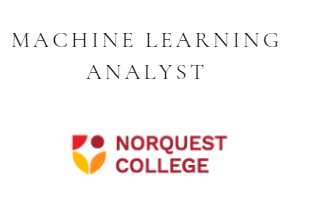

Developed by:
Enkeshie Parris,
Ruth Olasupo,
Oluwaseun Ademokun

[Link to form](https://docs.google.com/forms/d/1tExBK8RlcBqLLrZCo3IHKlwma2-6qCb66uOJHLT81LM/edit)

[Link to Dataset](https://docs.google.com/spreadsheets/d/1wRp72PgJDvbbyOS5IXtlnCC_0xv6sRbX0dhJmX_Bos0/edit?resourcekey#gid=1842242084)

Before performing any data analysis and exploratory data analysis (EDA), we need to clean and preprocess the dataset. The dataset contains some columns with similar information and others that may not be relevant for analysis. We'll first clean the dataset and then perform EDA.

Here are the steps we'll follow:

**Data Cleaning:**

Remove duplicate and irrelevant columns.

Handle missing values.

Convert data types if necessary.

Rename columns for clarity.

**Exploratory Data Analysis (EDA):**

Summary statistics.

Distribution of numerical variables.

Count of categorical variables.

Visualization (e.g., bar plots, histograms, box plots).


# Data Cleaning


In [ ]:
#Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the dataset with a specified encoding

data = pd.read_csv('Edited Proposed Data Collection.csv', encoding='latin1')



In [ ]:
data.head()

Timestamp Email address     Drop Off Location  City  \
0  9/23/2023 10:36:10           NaN    Londonderry Chapel   NaN   
1  9/23/2023 10:36:52           NaN  Gateway Stake Centre   NaN   
2  9/23/2023 10:40:22           NaN  Gateway Stake Centre   NaN   
3  9/23/2023 10:41:08           NaN  Gateway Stake Centre   NaN   
4  9/23/2023 10:44:10           NaN    Londonderry Chapel   NaN   

               Stake  Ward/Branch  Route Number/Name  \
0  Bonnie Doon Stake          NaN                NaN   
1      Gateway Stake          NaN                NaN   
2      Gateway Stake          NaN                NaN   
3      Gateway Stake          NaN                NaN   
4  Bonnie Doon Stake          NaN                NaN   

   # of Adult Volunteers in this route  # of Youth Volunteers in this route  \
0                                  1.0                                  3.0   
1                                  3.0                                  1.0   
2                                  2.0                                  0.0   
3                                  2.0                                  0.0   
4                                  1.0                                  0.0   

   # of Donation Bags Collected/Route  ...  Ward/Branch.3 Ward/Branch.4  \
0                                14.0  ...            NaN           NaN   
1                                18.0  ...            NaN           NaN   
2                                20.0  ...            NaN           NaN   
3                                20.0  ...            NaN           NaN   
4                                 2.0  ...            NaN           NaN   

   Ward/Branch.5 Ward/Branch.6  Ward/Branch.7  Comments  \
0            NaN           NaN            NaN       NaN   
1            NaN           NaN            NaN       NaN   
2            NaN           NaN            NaN       NaN   
3            NaN           NaN            NaN       NaN   
4            NaN           NaN            NaN       NaN   

   Number of routes completed  # of Doors in Route  The time you started at:  \
0                         NaN                   14                  10:00:00   
1                           2                  144                  10:00:00   
2                         NaN                  186                  10:00:00   
3                           1                  NaN                  10:00:00   
4                         NaN                    1                       NaN   

  The time you ended at  
0              10:25:00  
1              10:30:00  
2              10:30:00  
3              10:30:00  
4                   NaN  

[5 rows x 25 columns]

In [ ]:
# Display basic information about the dataset

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 25 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Timestamp                                             454 non-null    object 
 1   Email address                                         111 non-null    object 
 2   Drop Off Location                                     454 non-null    object 
 3   City                                                  0 non-null      float64
 4   Stake                                                 454 non-null    object 
 5   Ward/Branch                                           0 non-null      float64
 6   Route Number/Name                                     0 non-null      float64
 7   # of Adult Volunteers in this route                   453 non-null    float64
 8   # of Youth Volunteers in this route                   453 no

Remove the duplicate Ward/Branch columns

In [ ]:
# Remove duplicate and irrelevant columns. Email Address occurs twice in columns 1 & 12
# We merged the data in columns 13 to 19 into column 13, so we drop columns 5, 14 to 19 for Ward/Branch
# We also dropn city, comments, route number/name

data = data.drop(columns=['City','Email address','Email Address', 'Ward/Branch', 'Ward/Branch.2', 'Ward/Branch.3', 'Ward/Branch.4', 'Ward/Branch.5', 'Ward/Branch.6','Ward/Branch.7', 'Comments','Route Number/Name'])


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Timestamp                                             454 non-null    object 
 1   Drop Off Location                                     454 non-null    object 
 2   Stake                                                 454 non-null    object 
 3   # of Adult Volunteers in this route                   453 non-null    float64
 4   # of Youth Volunteers in this route                   453 non-null    float64
 5   # of Donation Bags Collected/Route                    453 non-null    float64
 6   Time to Complete (in minutes) pick up of bags /route  454 non-null    float64
 7   Did you complete more than 1 route?                   454 non-null    object 
 8   Ward/Branch.1                                         447 no

In [ ]:
data = data.rename(columns={'Ward/Branch.1': 'Ward/Branch'})

In [ ]:
data.head()

Timestamp     Drop Off Location              Stake  \
0  9/23/2023 10:36:10    Londonderry Chapel  Bonnie Doon Stake   
1  9/23/2023 10:36:52  Gateway Stake Centre      Gateway Stake   
2  9/23/2023 10:40:22  Gateway Stake Centre      Gateway Stake   
3  9/23/2023 10:41:08  Gateway Stake Centre      Gateway Stake   
4  9/23/2023 10:44:10    Londonderry Chapel  Bonnie Doon Stake   

   # of Adult Volunteers in this route  # of Youth Volunteers in this route  \
0                                  1.0                                  3.0   
1                                  3.0                                  1.0   
2                                  2.0                                  0.0   
3                                  2.0                                  0.0   
4                                  1.0                                  0.0   

   # of Donation Bags Collected/Route  \
0                                14.0   
1                                18.0   
2                                20.0   
3                                20.0   
4                                 2.0   

   Time to Complete (in minutes) pick up of bags /route  \
0                                               25.0      
1                                               25.0      
2                                               30.0      
3                                               25.0      
4                                                5.0      

  Did you complete more than 1 route?           Ward/Branch  \
0                                  No        Clareview Ward   
1                                 Yes  Crawford Plains Ward   
2                                  No     Silver Berry Ward   
3                                 Yes  Crawford Plains Ward   
4                                  No      Londonderry Ward   

  Number of routes completed # of Doors in Route The time you started at:  \
0                        NaN                  14                 10:00:00   
1                          2                 144                 10:00:00   
2                        NaN                 186                 10:00:00   
3                          1                 NaN                 10:00:00   
4                        NaN                   1                      NaN   

  The time you ended at  
0              10:25:00  
1              10:30:00  
2              10:30:00  
3              10:30:00  
4                   NaN

In [ ]:
# Display basic information about the dataset again

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Timestamp                                             454 non-null    object 
 1   Drop Off Location                                     454 non-null    object 
 2   Stake                                                 454 non-null    object 
 3   # of Adult Volunteers in this route                   453 non-null    float64
 4   # of Youth Volunteers in this route                   453 non-null    float64
 5   # of Donation Bags Collected/Route                    453 non-null    float64
 6   Time to Complete (in minutes) pick up of bags /route  454 non-null    float64
 7   Did you complete more than 1 route?                   454 non-null    object 
 8   Ward/Branch                                           447 no

In [ ]:
# Get Time Spent

# Convert the "The time you started at" and "The time you ended at" columns to datetime objects

data['The time you started at:'] = pd.to_datetime(data['The time you started at:'])
data['The time you ended at'] = pd.to_datetime(data['The time you ended at'])

# Calculate the time spent and create a new column "Time Spent"

data['Time Spent'] = (data['The time you ended at'] - data['The time you started at:']).dt.total_seconds() / 60

# Print the updated DataFrame

print(data[['The time you started at:', 'The time you ended at', 'Time Spent']])


    The time you started at: The time you ended at  Time Spent
0        2024-09-30 10:00:00   2024-09-30 10:25:00        25.0
1        2024-09-30 10:00:00   2024-09-30 10:30:00        30.0
2        2024-09-30 10:00:00   2024-09-30 10:30:00        30.0
3        2024-09-30 10:00:00   2024-09-30 10:30:00        30.0
4                        NaT                   NaT         NaN
..                       ...                   ...         ...
449      2024-09-30 10:30:00   2024-09-30 11:15:00        45.0
450      2024-09-30 10:30:00   2024-09-30 11:15:00        45.0
451      2024-09-30 18:00:00   2024-09-30 20:00:00       120.0
452      2024-09-30 10:30:00   2024-09-30 13:00:00       150.0
453                      NaT                   NaT         NaN

[454 rows x 3 columns]


In [ ]:
data.head(50)

Timestamp         Drop Off Location                 Stake  \
0   9/23/2023 10:36:10        Londonderry Chapel     Bonnie Doon Stake   
1   9/23/2023 10:36:52      Gateway Stake Centre         Gateway Stake   
2   9/23/2023 10:40:22      Gateway Stake Centre         Gateway Stake   
3   9/23/2023 10:41:08      Gateway Stake Centre         Gateway Stake   
4   9/23/2023 10:44:10        Londonderry Chapel     Bonnie Doon Stake   
5   9/23/2023 10:48:19           Bearspaw Chapel         Gateway Stake   
6   9/23/2023 10:50:22      Gateway Stake Centre         Gateway Stake   
7   9/23/2023 10:51:08        Londonderry Chapel     Bonnie Doon Stake   
8   9/23/2023 10:51:58        Londonderry Chapel     Bonnie Doon Stake   
9   9/23/2023 10:52:50           Bearspaw Chapel     Bonnie Doon Stake   
10  9/23/2023 10:53:37  Bonnie Doon Stake Centre     Bonnie Doon Stake   
11  9/23/2023 10:55:47        Londonderry Chapel     Bonnie Doon Stake   
12  9/23/2023 10:55:58        Londonderry Chapel     Bonnie Doon Stake   
13  9/23/2023 10:56:13    Coronation Park Chapel     Bonnie Doon Stake   
14  9/23/2023 10:58:47        Londonderry Chapel     Bonnie Doon Stake   
15  9/23/2023 10:59:19  Bonnie Doon Stake Centre     Bonnie Doon Stake   
16  9/23/2023 11:01:08        Londonderry Chapel     Bonnie Doon Stake   
17  9/23/2023 11:01:52        Londonderry Chapel     Bonnie Doon Stake   
18  9/23/2023 11:03:03        Londonderry Chapel     Bonnie Doon Stake   
19  9/23/2023 11:03:09  Bonnie Doon Stake Centre     Bonnie Doon Stake   
20  9/23/2023 11:03:15    Coronation Park Chapel     Bonnie Doon Stake   
21  9/23/2023 11:03:27      Gateway Stake Centre         Gateway Stake   
22  9/23/2023 11:04:02  Bonnie Doon Stake Centre     Bonnie Doon Stake   
23  9/23/2023 11:04:30    Coronation Park Chapel     Bonnie Doon Stake   
24  9/23/2023 11:05:27      Gateway Stake Centre         Gateway Stake   
25  9/23/2023 11:06:19           Bearspaw Chapel         Gateway Stake   
26  9/23/2023 11:06:35  Bonnie Doon Stake Centre     Bonnie Doon Stake   
27  9/23/2023 11:06:47      Gateway Stake Centre         Gateway Stake   
28  9/23/2023 11:06:48      Gateway Stake Centre         Gateway Stake   
29  9/23/2023 11:07:00  Bonnie Doon Stake Centre     Bonnie Doon Stake   
30  9/23/2023 11:07:50        Londonderry Chapel     Bonnie Doon Stake   
31  9/23/2023 11:08:23        Londonderry Chapel     Bonnie Doon Stake   
32  9/23/2023 11:09:01  Bonnie Doon Stake Centre     Bonnie Doon Stake   
33  9/23/2023 11:09:16        North Stake Centre  Edmonton North Stake   
34  9/23/2023 11:09:16      Gateway Stake Centre         Gateway Stake   
35  9/23/2023 11:09:20        North Stake Centre  Edmonton North Stake   
36  9/23/2023 11:09:47    Riverbend Stake Centre       Riverbend Stake   
37  9/23/2023 11:10:31        Londonderry Chapel     Bonnie Doon Stake   
38  9/23/2023 11:11:29    Coronation Park Chapel     Bonnie Doon Stake   
39  9/23/2023 11:11:38        North Stake Centre  Edmonton North Stake   
40  9/23/2023 11:11:39      Gateway Stake Centre         Gateway Stake   
41  9/23/2023 11:11:53        Londonderry Chapel     Bonnie Doon Stake   
42  9/23/2023 11:12:39        Londonderry Chapel     Bonnie Doon Stake   
43  9/23/2023 11:12:49        North Stake Centre  Edmonton North Stake   
44  9/23/2023 11:13:44      Gateway Stake Centre         Gateway Stake   
45  9/23/2023 11:14:24      Gateway Stake Centre         Gateway Stake   
46  9/23/2023 11:14:30  Bonnie Doon Stake Centre     Bonnie Doon Stake   
47  9/23/2023 11:14:32      Gateway Stake Centre         Gateway Stake   
48  9/23/2023 11:14:37        Londonderry Chapel     Bonnie Doon Stake   
49  9/23/2023 11:15:10           Bearspaw Chapel         Gateway Stake   

    # of Adult Volunteers in this route  # of Youth Volunteers in this route  \
0                                   1.0                                  3.0   
1                                   3.0                                  1.0  

In [ ]:
# Drop the "The time you started at" and "The time you ended at" columns

data = data.drop(columns=['The time you started at:', 'The time you ended at'])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Timestamp                                             454 non-null    object 
 1   Drop Off Location                                     454 non-null    object 
 2   Stake                                                 454 non-null    object 
 3   # of Adult Volunteers in this route                   453 non-null    float64
 4   # of Youth Volunteers in this route                   453 non-null    float64
 5   # of Donation Bags Collected/Route                    453 non-null    float64
 6   Time to Complete (in minutes) pick up of bags /route  454 non-null    float64
 7   Did you complete more than 1 route?                   454 non-null    object 
 8   Ward/Branch                                           447 no

In [ ]:
# Convert "Number of routes completed" and "# of Doors in Route" columns to numeric. Currently "objects"

data['Number of routes completed'] = pd.to_numeric(data['Number of routes completed'], errors='coerce')
data['# of Doors in Route'] = pd.to_numeric(data['# of Doors in Route'], errors='coerce')


In [ ]:
# Handle missing values (if any)
# Calculate the average values for 'Number of routes completed' and '# of Doors in Route'

avg_routes_completed = data['Number of routes completed'].mean()
avg_doors_in_route = data['# of Doors in Route'].mean()
avg_time_spent = data['Time Spent'].mean()

# Fill missing values with the averages

data['Number of routes completed'].fillna(avg_routes_completed, inplace=True)
data['# of Doors in Route'].fillna(avg_doors_in_route, inplace=True)
data['Time Spent'].fillna(avg_time_spent, inplace=True)
data.head()


Timestamp     Drop Off Location              Stake  \
0  9/23/2023 10:36:10    Londonderry Chapel  Bonnie Doon Stake   
1  9/23/2023 10:36:52  Gateway Stake Centre      Gateway Stake   
2  9/23/2023 10:40:22  Gateway Stake Centre      Gateway Stake   
3  9/23/2023 10:41:08  Gateway Stake Centre      Gateway Stake   
4  9/23/2023 10:44:10    Londonderry Chapel  Bonnie Doon Stake   

   # of Adult Volunteers in this route  # of Youth Volunteers in this route  \
0                                  1.0                                  3.0   
1                                  3.0                                  1.0   
2                                  2.0                                  0.0   
3                                  2.0                                  0.0   
4                                  1.0                                  0.0   

   # of Donation Bags Collected/Route  \
0                                14.0   
1                                18.0   
2                                20.0   
3                                20.0   
4                                 2.0   

   Time to Complete (in minutes) pick up of bags /route  \
0                                               25.0      
1                                               25.0      
2                                               30.0      
3                                               25.0      
4                                                5.0      

  Did you complete more than 1 route?           Ward/Branch  \
0                                  No        Clareview Ward   
1                                 Yes  Crawford Plains Ward   
2                                  No     Silver Berry Ward   
3                                 Yes  Crawford Plains Ward   
4                                  No      Londonderry Ward   

   Number of routes completed  # of Doors in Route  Time Spent  
0                    2.402685            14.000000   25.000000  
1                    2.000000           144.000000   30.000000  
2                    2.402685           186.000000   30.000000  
3                    1.000000           194.894484   30.000000  
4                    2.402685             1.000000  -30.269048

In [ ]:
# Handle missing values in 'number of adult volunteers', 'youth volunteers' and 'number of donation bags collected/route'
# Calculate the average values for 'number of adult volunteers', 'youth volunteers', and 'number of donation bags collected/route'

avg_Adult_Volunteers = data['# of Adult Volunteers in this route'].mean()
avg_Youth_Volunteers = data['# of Youth Volunteers in this route'].mean()
avg_Donation_Bags_Collected = data['# of Donation Bags Collected/Route'].mean()

# Fill missing values with the averages

data['# of Adult Volunteers in this route'].fillna(avg_Adult_Volunteers, inplace=True)
data['# of Youth Volunteers in this route'].fillna(avg_Youth_Volunteers, inplace=True)
data['# of Donation Bags Collected/Route'].fillna(avg_Donation_Bags_Collected, inplace=True)
data.head()

Timestamp     Drop Off Location              Stake  \
0  9/23/2023 10:36:10    Londonderry Chapel  Bonnie Doon Stake   
1  9/23/2023 10:36:52  Gateway Stake Centre      Gateway Stake   
2  9/23/2023 10:40:22  Gateway Stake Centre      Gateway Stake   
3  9/23/2023 10:41:08  Gateway Stake Centre      Gateway Stake   
4  9/23/2023 10:44:10    Londonderry Chapel  Bonnie Doon Stake   

   # of Adult Volunteers in this route  # of Youth Volunteers in this route  \
0                                  1.0                                  3.0   
1                                  3.0                                  1.0   
2                                  2.0                                  0.0   
3                                  2.0                                  0.0   
4                                  1.0                                  0.0   

   # of Donation Bags Collected/Route  \
0                                14.0   
1                                18.0   
2                                20.0   
3                                20.0   
4                                 2.0   

   Time to Complete (in minutes) pick up of bags /route  \
0                                               25.0      
1                                               25.0      
2                                               30.0      
3                                               25.0      
4                                                5.0      

  Did you complete more than 1 route?           Ward/Branch  \
0                                  No        Clareview Ward   
1                                 Yes  Crawford Plains Ward   
2                                  No     Silver Berry Ward   
3                                 Yes  Crawford Plains Ward   
4                                  No      Londonderry Ward   

   Number of routes completed  # of Doors in Route  Time Spent  
0                    2.402685            14.000000   25.000000  
1                    2.000000           144.000000   30.000000  
2                    2.402685           186.000000   30.000000  
3                    1.000000           194.894484   30.000000  
4                    2.402685             1.000000  -30.269048

In [ ]:
# Check for missing values

print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Timestamp                                               0
Drop Off Location                                       0
Stake                                                   0
# of Adult Volunteers in this route                     0
# of Youth Volunteers in this route                     0
# of Donation Bags Collected/Route                      0
Time to Complete (in minutes) pick up of bags /route    0
Did you complete more than 1 route?                     0
Ward/Branch                                             7
Number of routes completed                              0
# of Doors in Route                                     0
Time Spent                                              0
dtype: int64


In [ ]:
# Fill in the missing Ward/Branch

data['Ward/Branch'].fillna(data['Ward/Branch'].mode()[0], inplace=True)


In [ ]:
# Check for missing values

print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Timestamp                                               0
Drop Off Location                                       0
Stake                                                   0
# of Adult Volunteers in this route                     0
# of Youth Volunteers in this route                     0
# of Donation Bags Collected/Route                      0
Time to Complete (in minutes) pick up of bags /route    0
Did you complete more than 1 route?                     0
Ward/Branch                                             0
Number of routes completed                              0
# of Doors in Route                                     0
Time Spent                                              0
dtype: int64


In [ ]:

# Rename columns for clarity

data = data.rename(columns={
    'Timestamp': 'Date',
    'Drop Off Location': 'Location',
    'City': 'City',
    'Stake': 'Stake',
    'Route Number/Name': 'Route',
    '# of Adult Volunteers in this route': '# of Adult Volunteers',
    '# of Youth Volunteers in this route': '# of Youth Volunteers',
    '# of Donation Bags Collected/Route': 'Donation Bags Collected',
    'Time to Complete (in minutes) pick up of bags /route': 'Time to Complete (min)',
    'Did you complete more than 1 route?': 'Completed More Than One Route',
    'Number of routes completed': 'Routes Completed',
    '# of Doors in Route': 'Doors in Route'
})


In [ ]:
# Print the dtypes for each column

data.dtypes

Date                              object
Location                          object
Stake                             object
# of Adult Volunteers              int64
# of Youth Volunteers              int64
Donation Bags Collected            int64
Time to Complete (min)           float64
Completed More Than One Route     object
Ward/Branch                       object
Routes Completed                   int64
Doors in Route                     int64
Time Spent                       float64
dtype: object

In [ ]:
# Convert columns to integer data types

int_columns = ['# of Adult Volunteers', '# of Youth Volunteers', 'Donation Bags Collected','Routes Completed','Doors in Route']
data[int_columns] = data[int_columns].astype(int)

If errors like this pop up:
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
.....

ValueError: invalid literal for int() with base 10: 'Two'
You might need to do a search of the erroneous word in the dataset and replace with values.

Reupload the dataset and rerun.

In [ ]:
# Convert columns to the right data types

data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' to datetime
data['Routes Completed'] = data['Routes Completed'].astype(int)  # Convert 'Routes Completed' to int
data['Doors in Route'] = data['Doors in Route'].astype(int)  # Convert 'Doors in Route' to int
data['Time Spent'] = data['Time Spent'].astype(float)  # Convert 'Time Spent' to float




In [ ]:
data['Completed More Than One Route'] = data['Completed More Than One Route'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)

# data['Completed More Than One Route'] = data['Completed More Than One Route'].astype(str)

print(data.dtypes)



Date                             datetime64[ns]
Location                                 object
Stake                                    object
# of Adult Volunteers                     int64
# of Youth Volunteers                     int64
Donation Bags Collected                   int64
Time to Complete (min)                  float64
Completed More Than One Route             int64
Ward/Branch                              object
Routes Completed                          int64
Doors in Route                            int64
Time Spent                              float64
dtype: object


In [ ]:
data.head(50)

Date                  Location                 Stake  \
0  2023-09-23 10:36:10        Londonderry Chapel     Bonnie Doon Stake   
1  2023-09-23 10:36:52      Gateway Stake Centre         Gateway Stake   
2  2023-09-23 10:40:22      Gateway Stake Centre         Gateway Stake   
3  2023-09-23 10:41:08      Gateway Stake Centre         Gateway Stake   
4  2023-09-23 10:44:10        Londonderry Chapel     Bonnie Doon Stake   
5  2023-09-23 10:48:19           Bearspaw Chapel         Gateway Stake   
6  2023-09-23 10:50:22      Gateway Stake Centre         Gateway Stake   
7  2023-09-23 10:51:08        Londonderry Chapel     Bonnie Doon Stake   
8  2023-09-23 10:51:58        Londonderry Chapel     Bonnie Doon Stake   
9  2023-09-23 10:52:50           Bearspaw Chapel     Bonnie Doon Stake   
10 2023-09-23 10:53:37  Bonnie Doon Stake Centre     Bonnie Doon Stake   
11 2023-09-23 10:55:47        Londonderry Chapel     Bonnie Doon Stake   
12 2023-09-23 10:55:58        Londonderry Chapel     Bonnie Doon Stake   
13 2023-09-23 10:56:13    Coronation Park Chapel     Bonnie Doon Stake   
14 2023-09-23 10:58:47        Londonderry Chapel     Bonnie Doon Stake   
15 2023-09-23 10:59:19  Bonnie Doon Stake Centre     Bonnie Doon Stake   
16 2023-09-23 11:01:08        Londonderry Chapel     Bonnie Doon Stake   
17 2023-09-23 11:01:52        Londonderry Chapel     Bonnie Doon Stake   
18 2023-09-23 11:03:03        Londonderry Chapel     Bonnie Doon Stake   
19 2023-09-23 11:03:09  Bonnie Doon Stake Centre     Bonnie Doon Stake   
20 2023-09-23 11:03:15    Coronation Park Chapel     Bonnie Doon Stake   
21 2023-09-23 11:03:27      Gateway Stake Centre         Gateway Stake   
22 2023-09-23 11:04:02  Bonnie Doon Stake Centre     Bonnie Doon Stake   
23 2023-09-23 11:04:30    Coronation Park Chapel     Bonnie Doon Stake   
24 2023-09-23 11:05:27      Gateway Stake Centre         Gateway Stake   
25 2023-09-23 11:06:19           Bearspaw Chapel         Gateway Stake   
26 2023-09-23 11:06:35  Bonnie Doon Stake Centre     Bonnie Doon Stake   
27 2023-09-23 11:06:47      Gateway Stake Centre         Gateway Stake   
28 2023-09-23 11:06:48      Gateway Stake Centre         Gateway Stake   
29 2023-09-23 11:07:00  Bonnie Doon Stake Centre     Bonnie Doon Stake   
30 2023-09-23 11:07:50        Londonderry Chapel     Bonnie Doon Stake   
31 2023-09-23 11:08:23        Londonderry Chapel     Bonnie Doon Stake   
32 2023-09-23 11:09:01  Bonnie Doon Stake Centre     Bonnie Doon Stake   
33 2023-09-23 11:09:16        North Stake Centre  Edmonton North Stake   
34 2023-09-23 11:09:16      Gateway Stake Centre         Gateway Stake   
35 2023-09-23 11:09:20        North Stake Centre  Edmonton North Stake   
36 2023-09-23 11:09:47    Riverbend Stake Centre       Riverbend Stake   
37 2023-09-23 11:10:31        Londonderry Chapel     Bonnie Doon Stake   
38 2023-09-23 11:11:29    Coronation Park Chapel     Bonnie Doon Stake   
39 2023-09-23 11:11:38        North Stake Centre  Edmonton North Stake   
40 2023-09-23 11:11:39      Gateway Stake Centre         Gateway Stake   
41 2023-09-23 11:11:53        Londonderry Chapel     Bonnie Doon Stake   
42 2023-09-23 11:12:39        Londonderry Chapel     Bonnie Doon Stake   
43 2023-09-23 11:12:49        North Stake Centre  Edmonton North Stake   
44 2023-09-23 11:13:44      Gateway Stake Centre         Gateway Stake   
45 2023-09-23 11:14:24      Gateway Stake Centre         Gateway Stake   
46 2023-09-23 11:14:30  Bonnie Doon Stake Centre     Bonnie Doon Stake   
47 2023-09-23 11:14:32      Gateway Stake Centre         Gateway Stake   
48 2023-09-23 11:14:37        Londonderry Chapel     Bonnie Doon Stake   
49 2023-09-23 11:15:10           Bearspaw Chapel         Gateway Stake   

    # of Adult Volunteers  # of Youth Volunteers  Donation Bags Collected  \
0                       1                      3                       14   
1                       3                      1                       18   
2           

# Exploratory Data Analysis

In [ ]:
data.describe()

Date  # of Adult Volunteers  \
count                            454              454.00000   
mean   2023-09-24 11:23:54.110131968                2.50000   
min              2023-09-23 10:36:10                0.00000   
25%    2023-09-23 11:38:33.249999872                2.00000   
50%       2023-09-23 12:04:36.500000                2.00000   
75%              2023-09-23 12:41:58                2.00000   
max              2024-09-10 16:03:36               46.00000   
std                              NaN                3.97717   

       # of Youth Volunteers  Donation Bags Collected  Time to Complete (min)  \
count             454.000000               454.000000              454.000000   
mean                1.570485                32.715859               55.106828   
min                 0.000000                 1.000000                1.000000   
25%                 0.000000                17.000000               30.000000   
50%                 1.000000                25.000000               45.000000   
75%                 3.000000                37.000000               60.000000   
max                20.000000               555.000000              245.000000   
std                 1.895297                35.370831               34.938295   

       Completed More Than One Route  Routes Completed  Doors in Route  \
count                     454.000000        454.000000      454.000000   
mean                        0.339207          2.129956      194.821586   
min                         0.000000          1.000000        1.000000   
25%                         0.000000          2.000000      116.000000   
50%                         0.000000          2.000000      172.500000   
75%                         1.000000          2.000000      214.750000   
max                         1.000000          8.000000     2500.000000   
std                         0.473962          0.629188      173.319306   

       Time Spent  
count  454.000000  
mean   -30.269048  
min   -690.000000  
25%     25.000000  
50%     45.000000  
75%     62.500000  
max    754.000000  
std    240.655794

Text(0.5, 1.0, 'Distribution of Adult Volunteers')

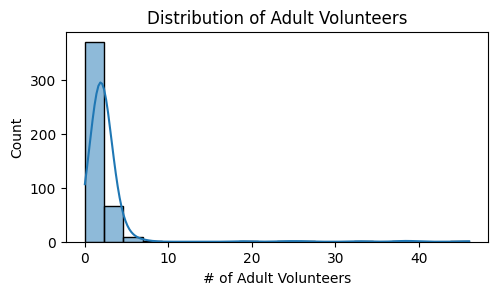

In [ ]:
# Visualize the distribution of numerical features
# A histogram plot of the adult volunteers

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data['# of Adult Volunteers'], bins=20, kde=True)
plt.title('Distribution of Adult Volunteers')

Text(0.5, 1.0, 'Distribution of Youth Volunteers')

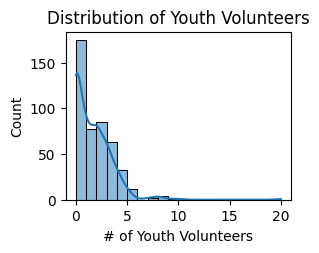

In [ ]:
# A histogram plot of the youth volunteers

plt.subplot(2, 2, 2)
sns.histplot(data['# of Youth Volunteers'], bins=20, kde=True)
plt.title('Distribution of Youth Volunteers')

Text(0.5, 1.0, 'Distribution of Donation Bags Collected')

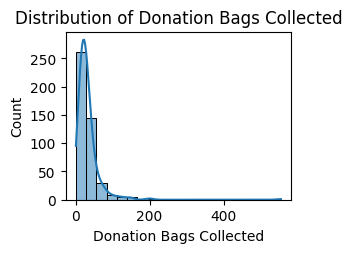

In [ ]:
# A histogram plot of the donation bags collected

plt.subplot(2, 2, 3)
sns.histplot(data['Donation Bags Collected'], bins=20, kde=True)
plt.title('Distribution of Donation Bags Collected')

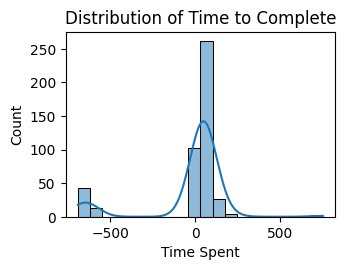

In [ ]:
# A histogram plot of the time to complete collection

plt.subplot(2, 2, 4)
sns.histplot(data['Time Spent'], bins=20, kde=True)
plt.title('Distribution of Time to Complete')

plt.tight_layout()
plt.show()


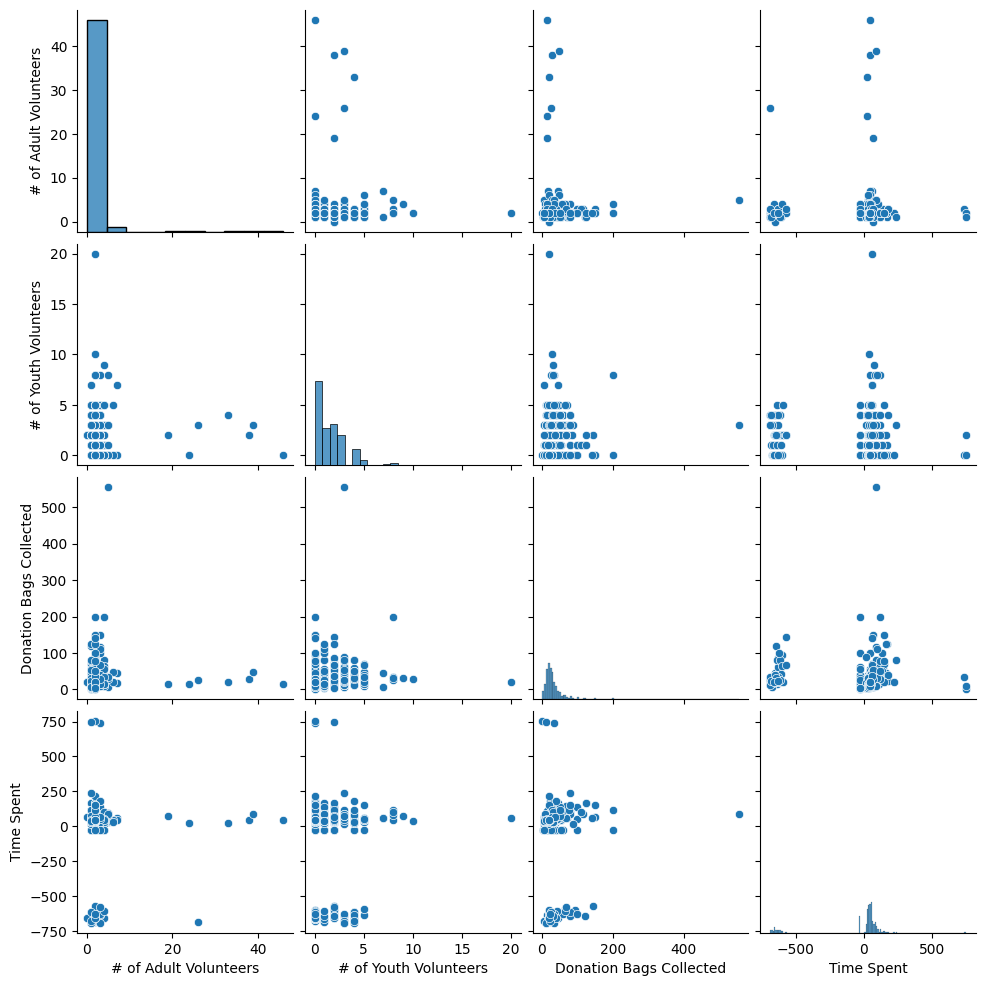

In [ ]:
# Visualize relationships between numerical features

sns.pairplot(data[['# of Adult Volunteers', '# of Youth Volunteers', 'Donation Bags Collected', 'Time Spent']])
plt.show()

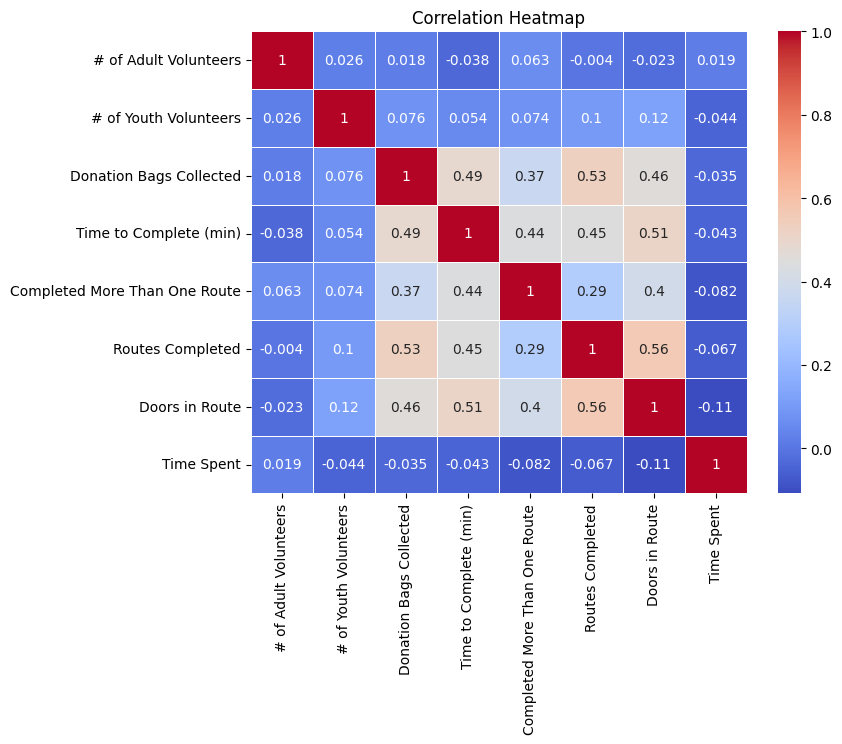

In [ ]:
# Correlation heatmap for numerical features

import numpy as np
correlation_matrix = data.select_dtypes(include=np.number).corr() # Select only numerical columns for correlation calculation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

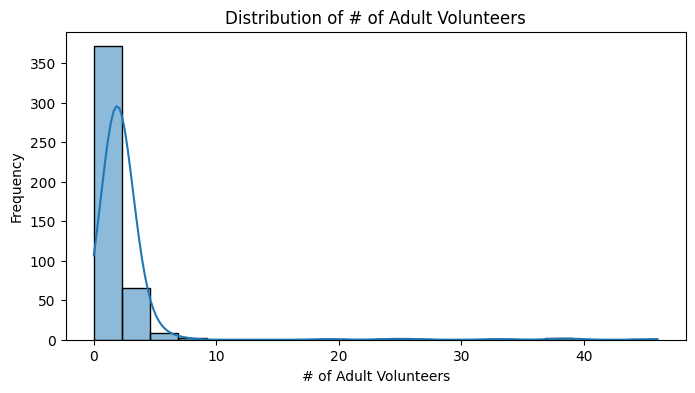

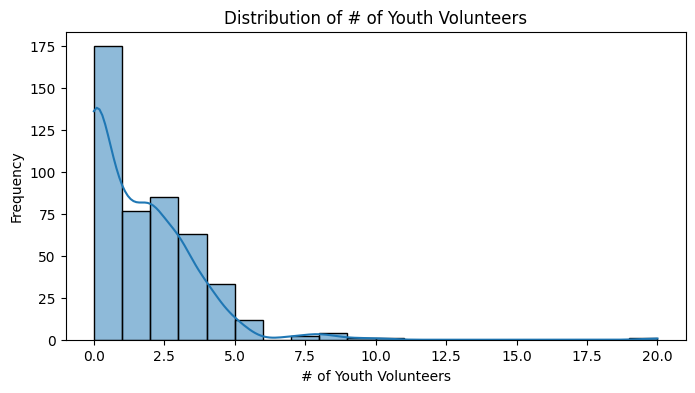

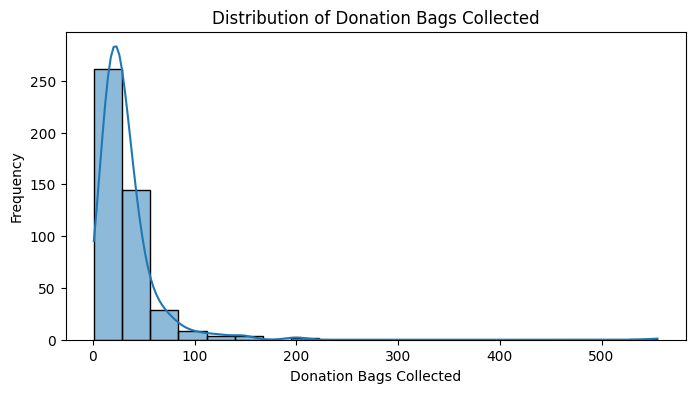

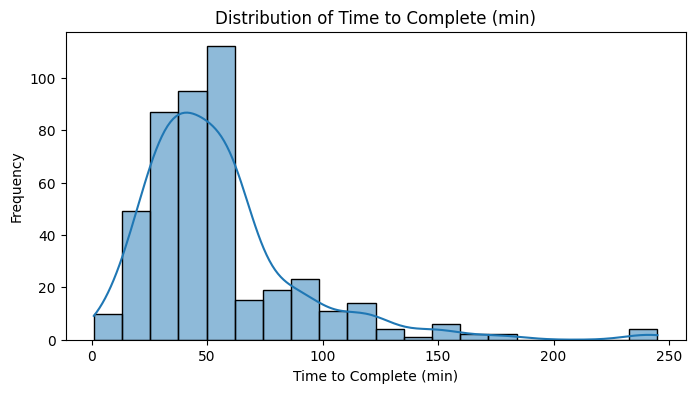

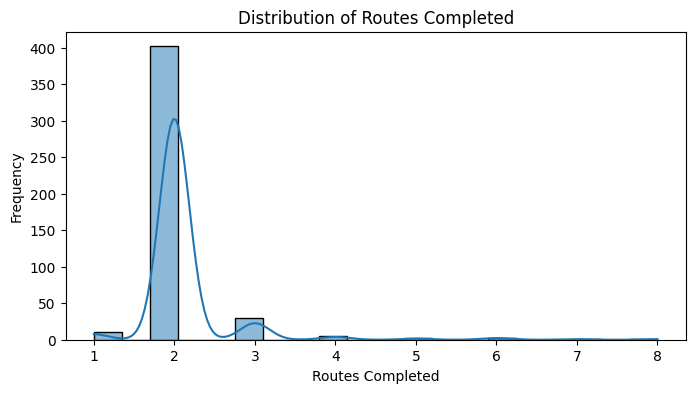

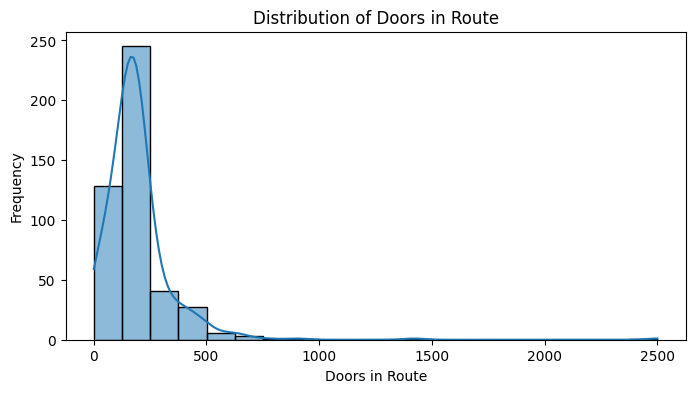

In [ ]:

# Distribution of numerical variables

numerical_columns = ['# of Adult Volunteers', '# of Youth Volunteers', 'Donation Bags Collected', 'Time to Complete (min)', 'Routes Completed', 'Doors in Route']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

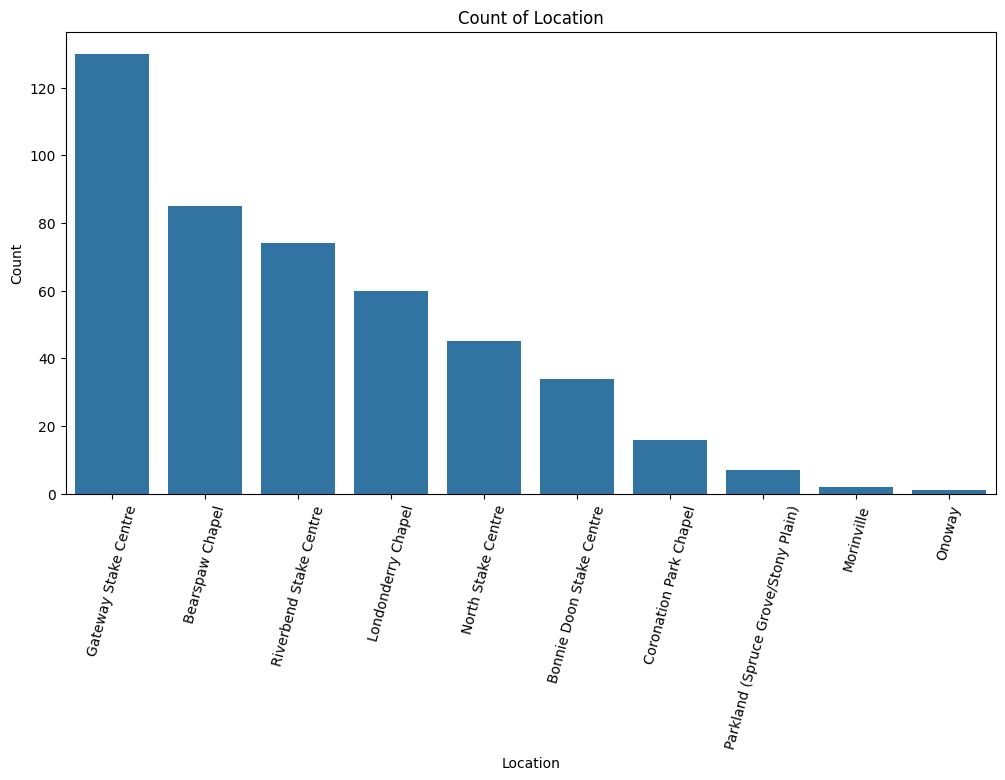

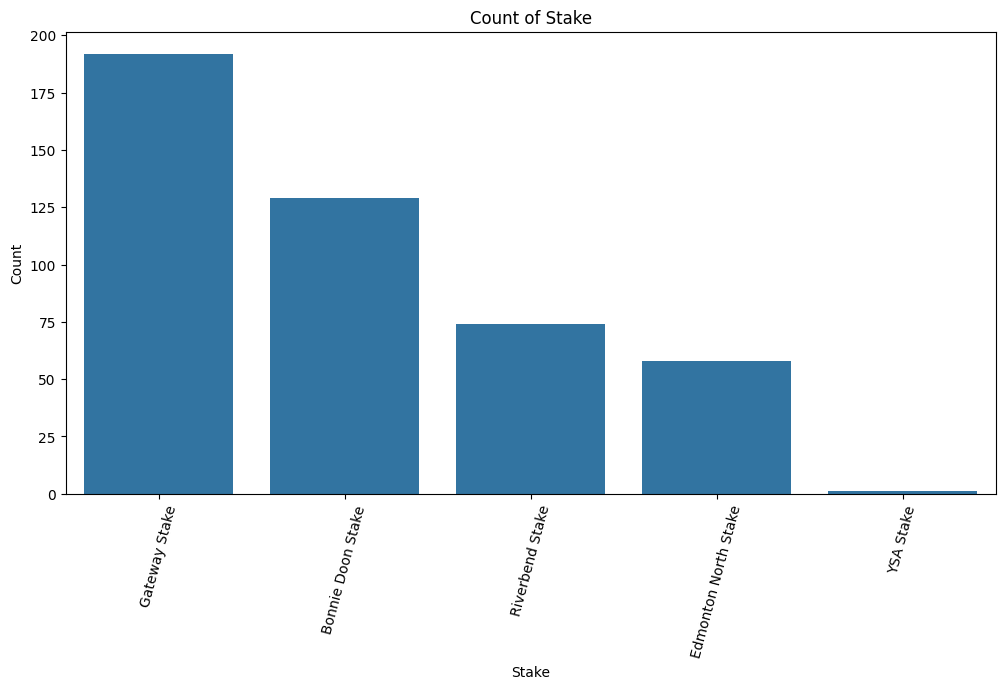

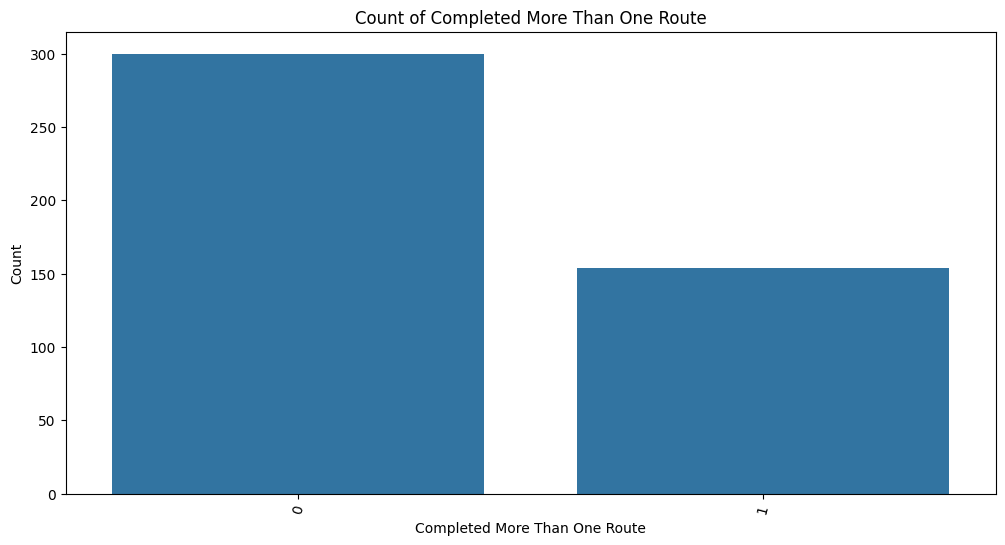

In [ ]:
# Count of categorical variables
# rotation ajusted for easy readability

categorical_columns = ['Location','Stake','Completed More Than One Route']
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=75)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

<ipython-input-48-70ec11b2cef9>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Stake', y='Donation Bags Collected', ci=None)


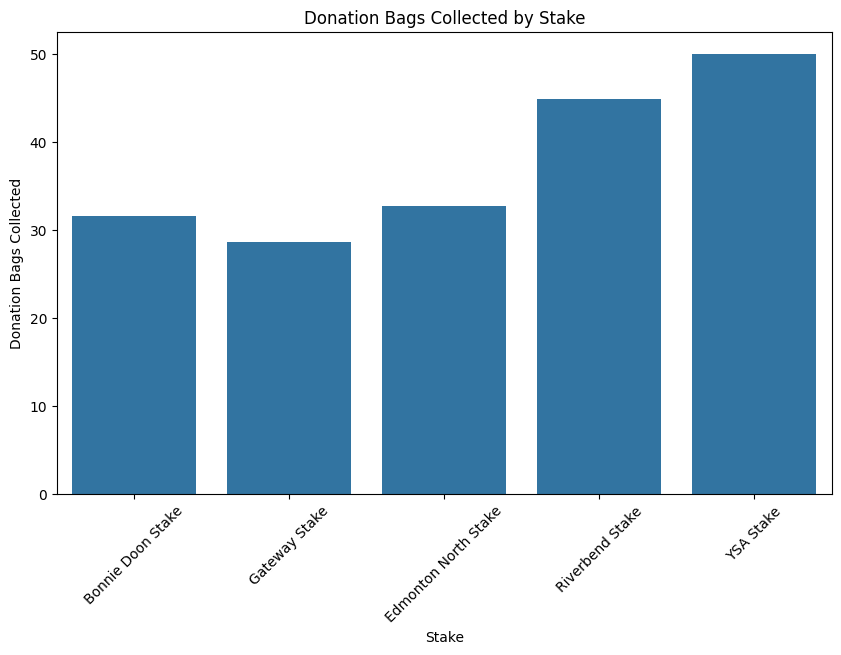

In [ ]:

# Visualizations
# Example: Bar plot of Stake vs. Donation Bags Collected

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Stake', y='Donation Bags Collected', ci=None)
plt.title('Donation Bags Collected by Stake')
plt.xlabel('Stake')
plt.ylabel('Donation Bags Collected')
plt.xticks(rotation=45)
plt.show()


#AutoEDA

In [ ]:
!pip install pandas-profiling[notebook,html]

  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.2 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 81.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a0d2e80bba45f38be4f455f17a585469bb524cc46957f7e977e54515af0ce72e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport # Use ydata_profiling instead of pandas_profiling
from ydata_profiling.utils.cache import cache_file # Use ydata_profiling instead of pandas_profiling

# Generate Report

In [ ]:
profile = ProfileReport(data, title="Edmonton Food Drive", html={'style': {'full_width': True}}, sort=None)

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Interview Readiness

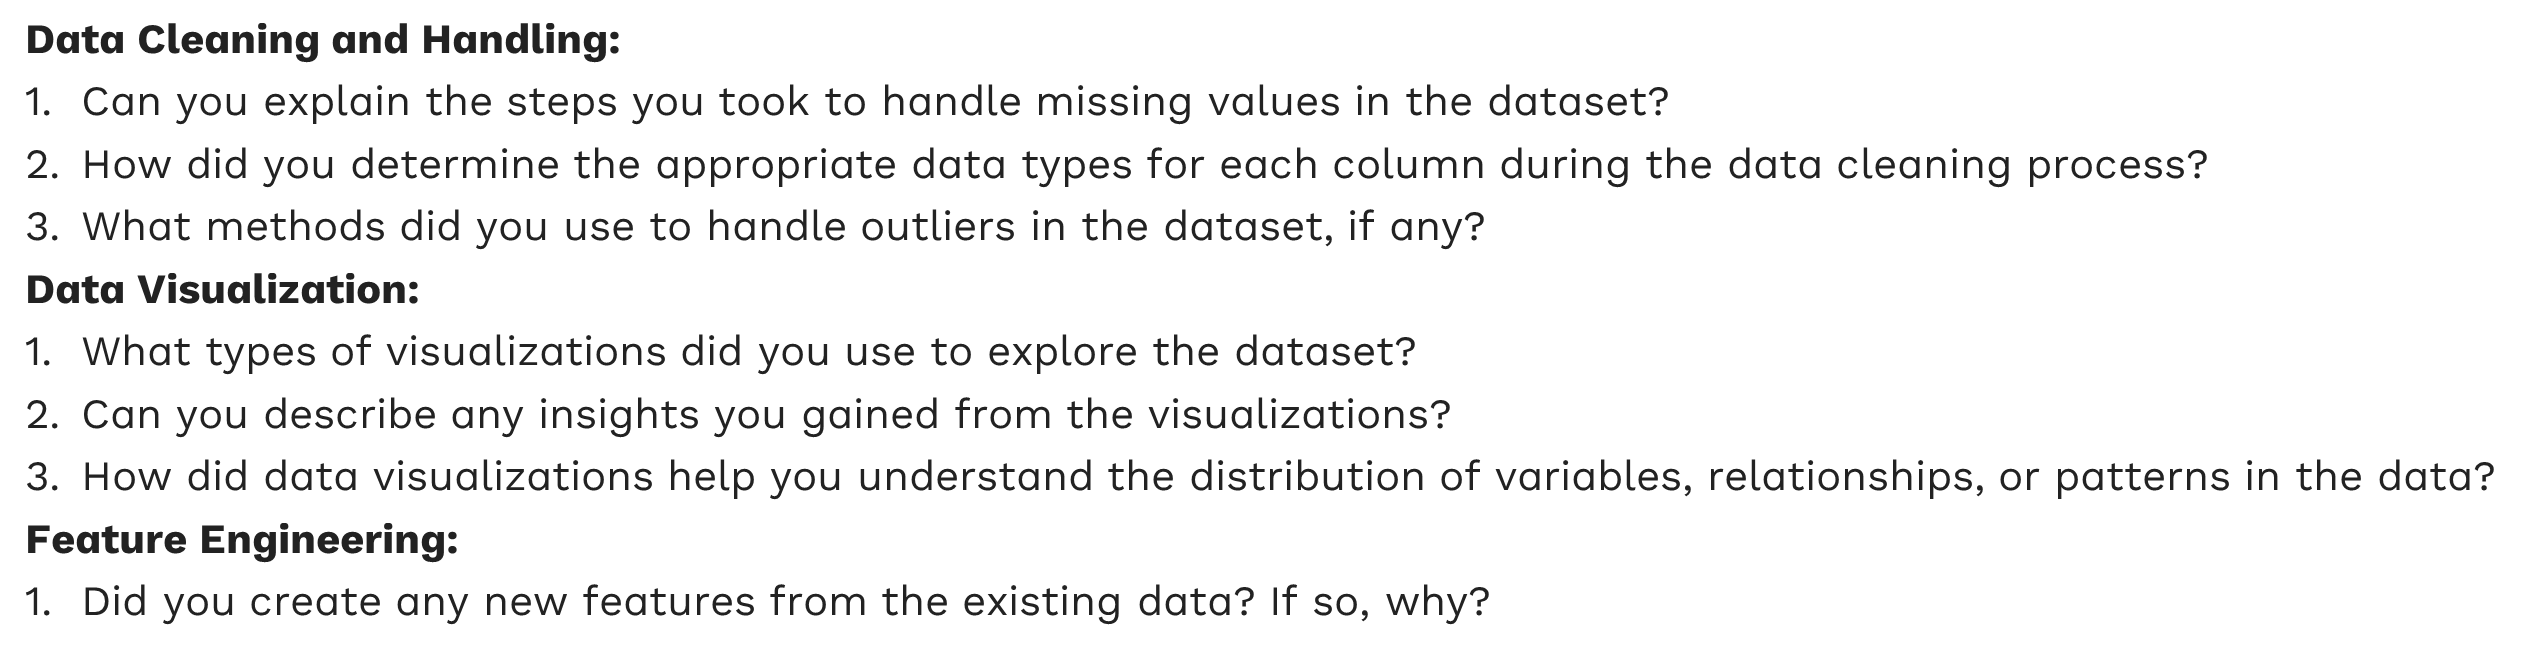

Data Cleaning and Handling

1.   We took the average of the columns with missing values to fill values for
     the missing data points, such as the number of adult volunteers, number of bags donated, average routes completed, etc. For object type values such as Ward/Branch, we filled in the mode.
2.   We dropped the columns that were repetitive
     We used 'int' for numerical data types, objects for categorical data types
     and float for time.
3.   We retained the outliers for relevant questions and appropriate research,
     as well as possible ways to improve the form/methods used in the collection of data.

Data Visualization

1.  Scatter plots, heatmap, histogram, bar charts and pie charts.
2.  - Using the scatter plots and heatmap we determined
      there weren't any correlations between the features which implies weak relationships between the features.
    - From the histogram distribution and bar charts we noticed a right skew  
      for features such as the youth volunteers, adult volunteers and number of donated bags showing there was an uneven distribution across the collection or assigning of volunteers to various wards
3. -  As explained in 2 above

Feature Engineering

1. We didn't create any new features as we focused more on understanding the
   dataset so that we would be able to ask more informed questions during the interview with the clients and also prepare for our data collection.
    

# Other Visualizations


1. **Bar Chart for Bags Collected:**
   - Display the total number of bags collected for each region, ward, or route. This helps in comparing collection efficiency across different areas.

2. **Pie Chart for Bags Collected by Region:**
   - Show the percentage distribution of bags collected across different regions. Each slice represents a region, and the size of the slice indicates the proportion of bags collected.

3. **Line Chart for Time Spent:**
   - Plot the average time spent on each route over time. This chart can help identify trends in the time taken for collections.

4. **Stacked Bar Chart for Bags Collected by Ward:**
   - Display the number of bags collected in each ward, with different colors representing different routes within the ward. This helps in understanding route-wise collections within a ward.

5. **Bubble Chart for Time Spent vs. Bags Collected:**
   - Represent each route as a bubble where the X-axis is the time spent, the Y-axis is the bags collected, and the size of the bubble represents the number of collections. This chart can reveal efficiency outliers.

6. **Heatmap for Bags Collected and Time Spent:**
   - Create a heatmap where the X-axis represents time spent, the Y-axis represents routes, and the color intensity represents the number of bags collected. This visualization helps identify patterns based on both time spent and bags collected.

7. **Bar Chart for Average Time Spent by Ward:**
   - Display the average time spent on routes within each ward. This can help identify wards with particularly time-consuming routes.

8. **Box Plot for Time Spent:**
   - Use a box plot to show the distribution of time spent on different routes. This visualization provides insights into the variability in collection times.

9. **Donut Chart for Bags Collected by Route:**
   - Display the proportion of bags collected by different routes within a ward. The inner circle represents the total bags collected in the ward, and the outer ring shows the distribution by routes.

10. **Choropleth Map for Bags Collected by Region:**
    - Use a map visualization where regions are shaded based on the total bags collected. Darker shades represent higher collections, providing a geographic perspective

<ipython-input-124-4c93fdb0cf6e>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Ward/Branch', y='Donation Bags Collected', ci=None)


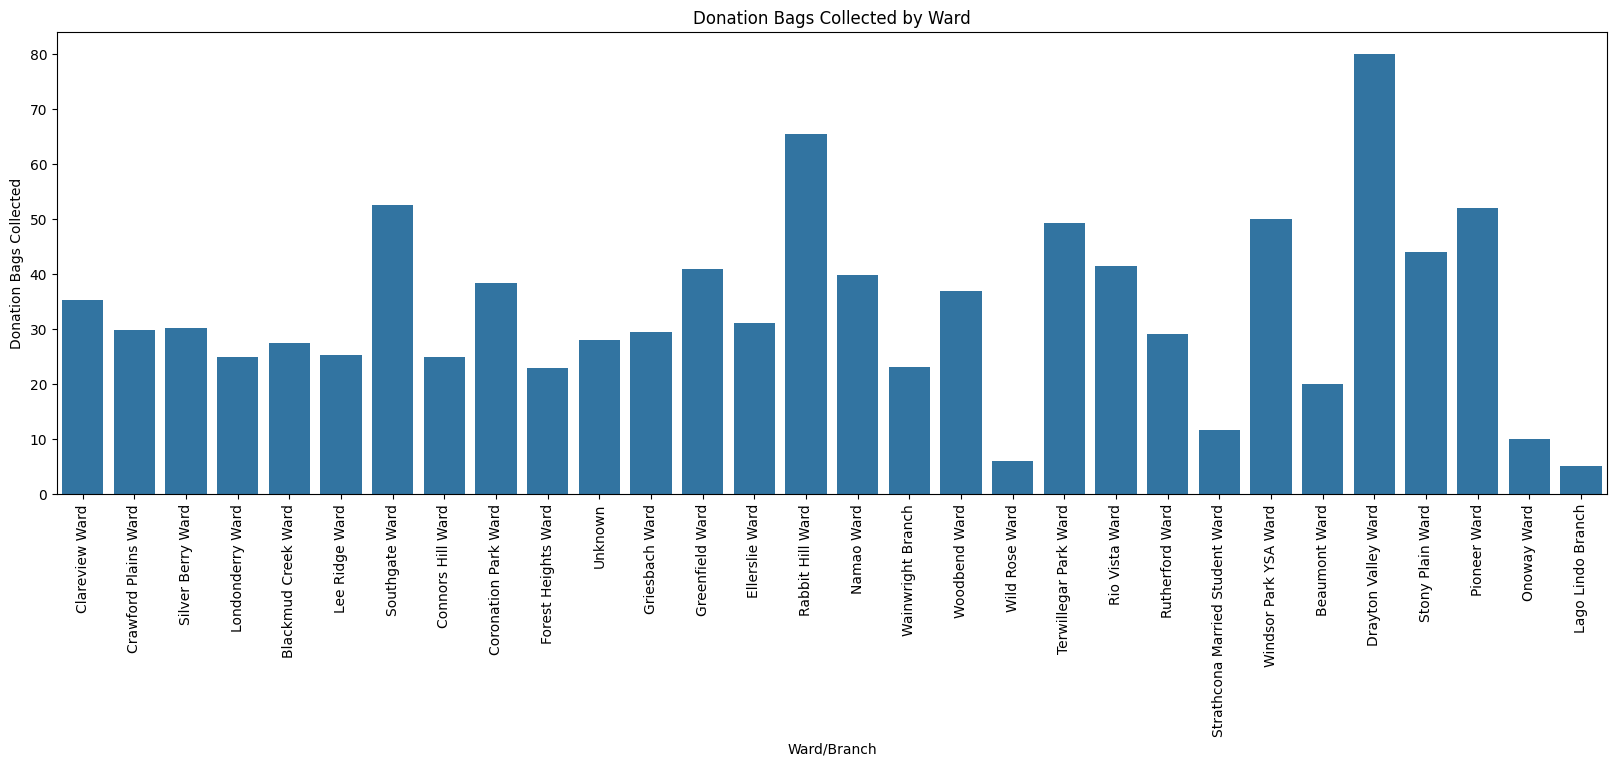

In [ ]:
# Bar chart for Ward/Branch vs. Donation Bags Collected
# We used figure size 20, 6 to obtain a well-spaced bar chart
# We used a rotation of 90 to ensure appropriate labelling of x axis

plt.figure(figsize=(20, 6))
sns.barplot(data=data, x='Ward/Branch', y='Donation Bags Collected', ci=None)
plt.title('Donation Bags Collected by Ward')
plt.xlabel('Ward/Branch')
plt.ylabel('Donation Bags Collected')
plt.xticks(rotation=90)
plt.show()


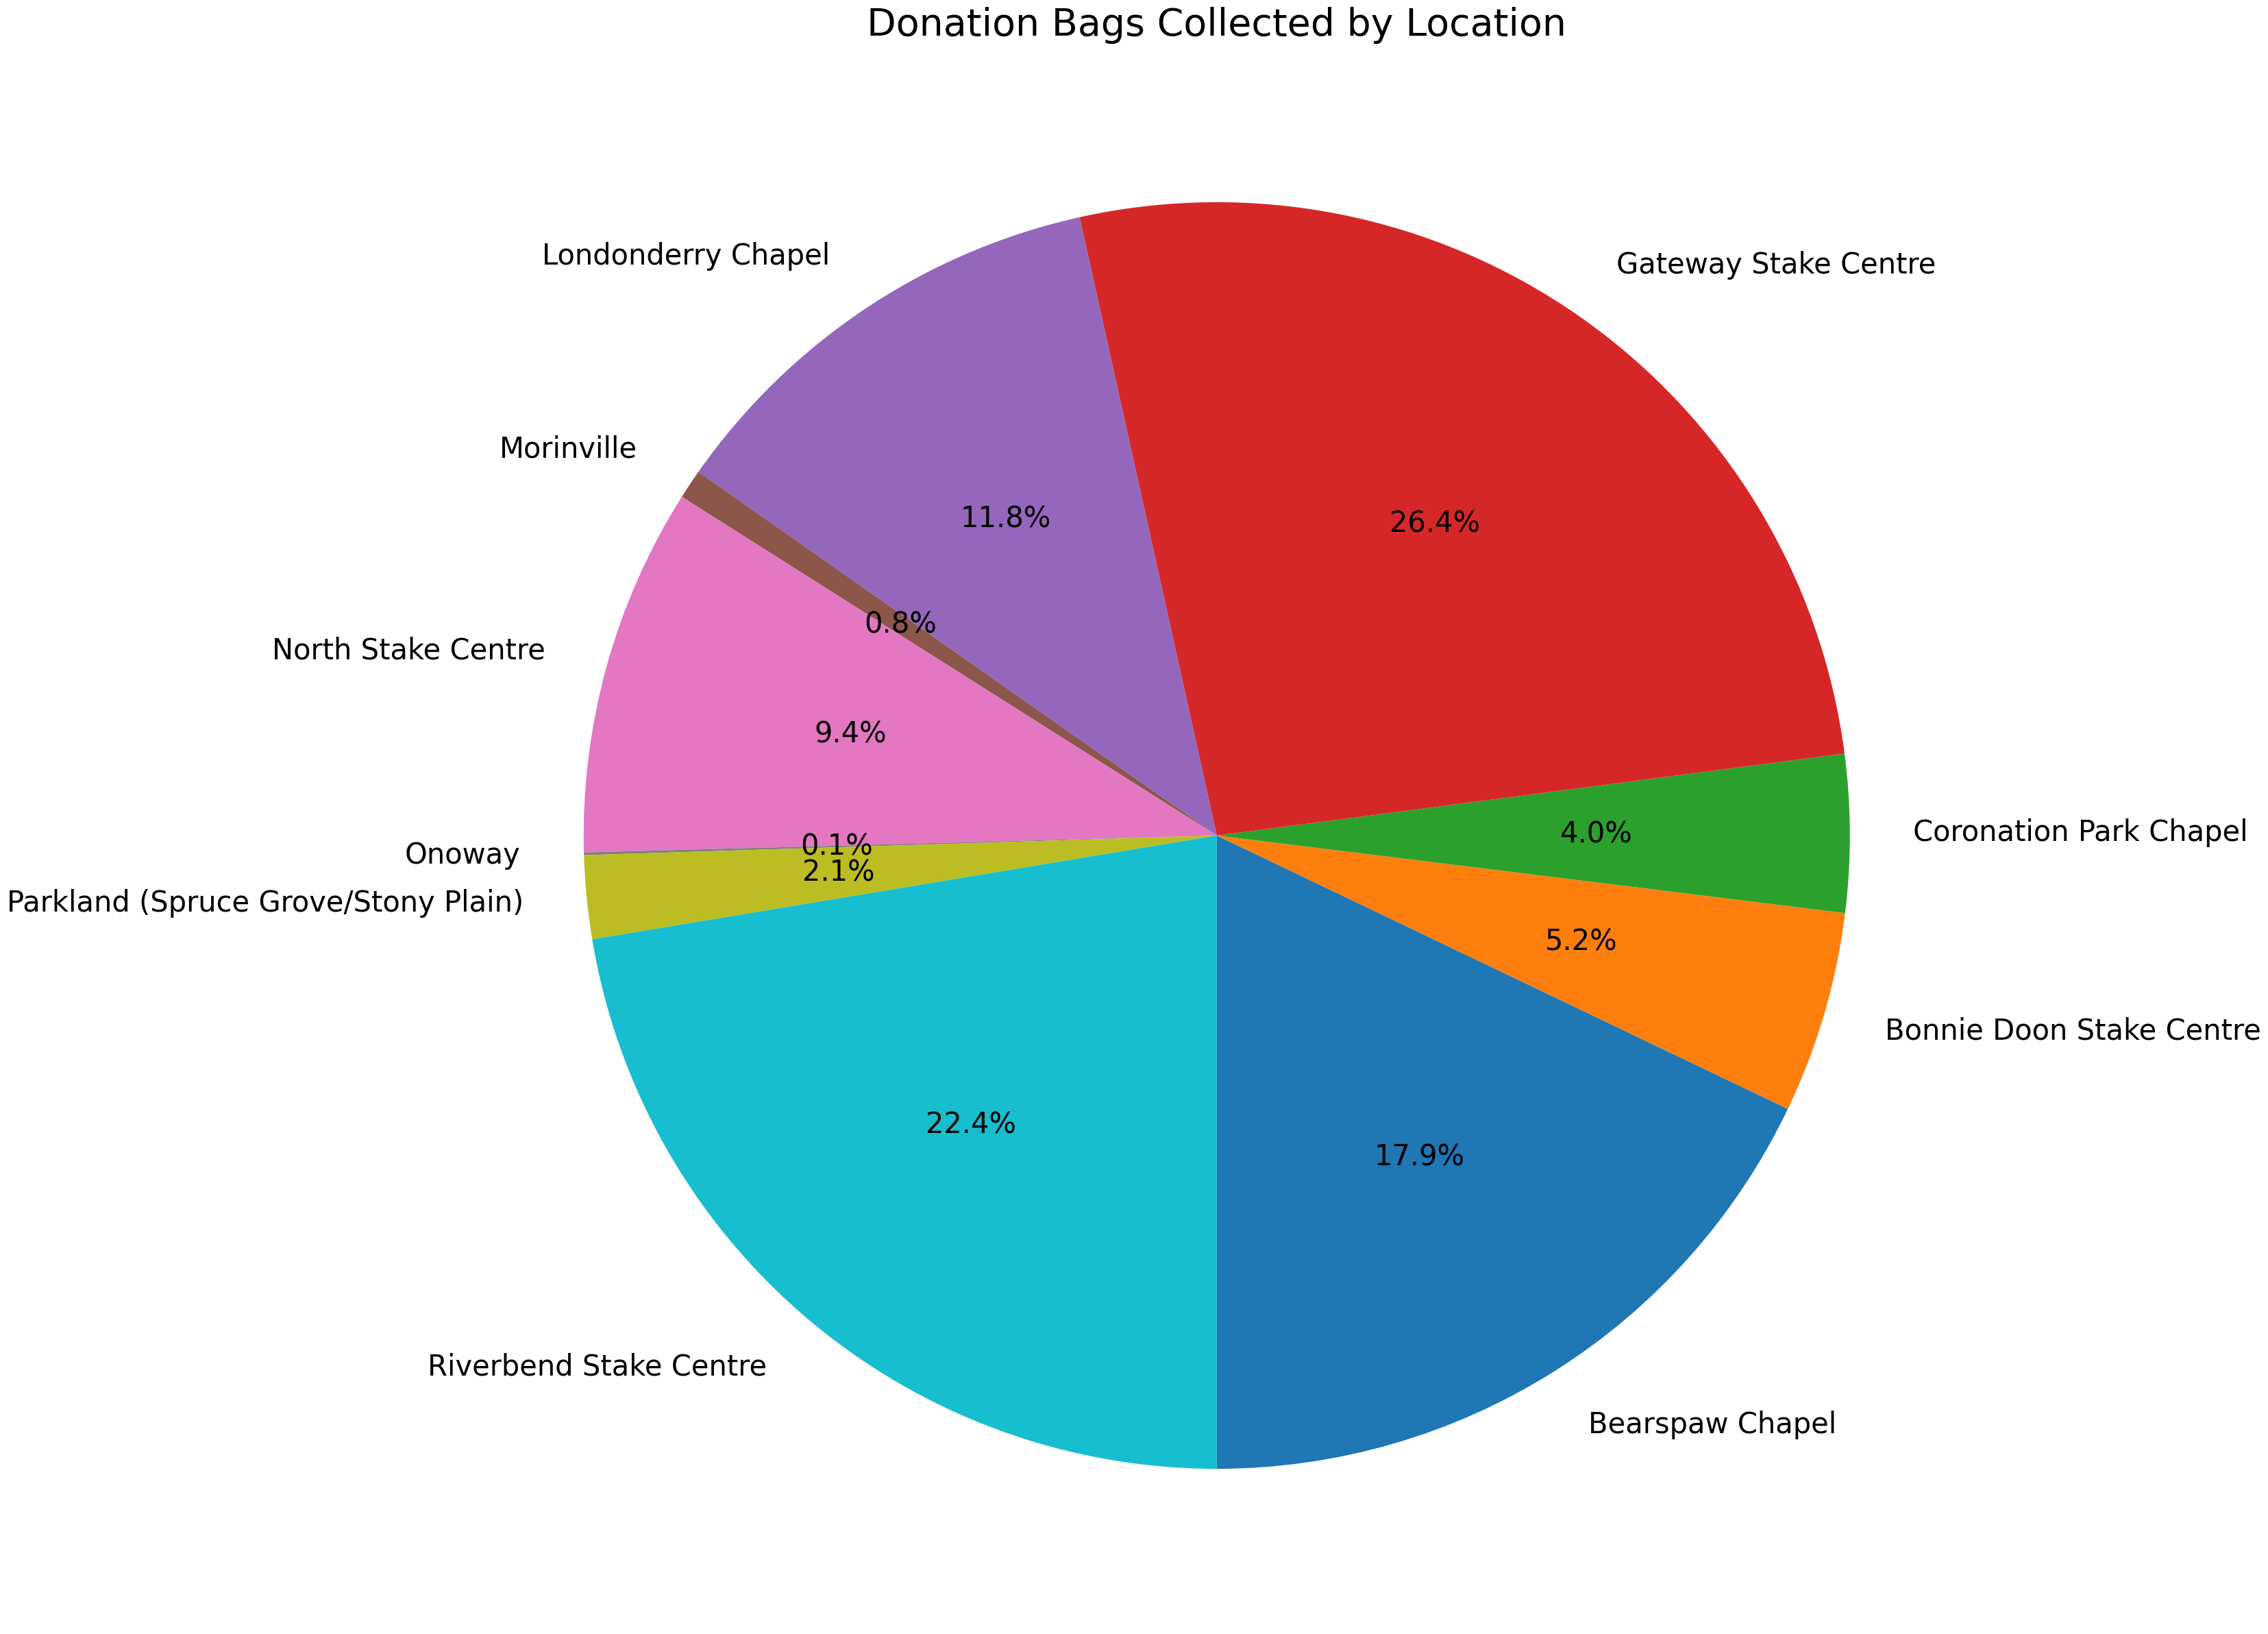

In [ ]:
# A pie chart for Location vs. Donation Bags Collected
# We used figure size 20, 6 to obtain a well-spaced bar chart
# We used a rotation of 90 to ensure appropriate labelling of x axis
# We  reduce the number of floating point to 1f for easy readability

bags_by_ward = data.groupby('Location')['Donation Bags Collected'].sum()
plt.figure(figsize=(30, 30))
plt.pie(bags_by_ward, labels=bags_by_ward.index, autopct='%1.1f%%', startangle=270, textprops={'fontsize': 30})
plt.title('Donation Bags Collected by Location', fontsize = 40)
plt.show()


In [ ]:
from google.colab import files

data.to_csv('cleaned_food_drive_data.csv', index=False)
files.download('cleaned_food_drive_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>